# Trueskill

How does trueskill converge over the finals?

In [1]:
from viz import load_all_games
from viz import score_with_default_trueskill 
from viz import plot_players 
import trueskill

import datetime
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline  

In [2]:
games = load_all_games() # Takes a minute

In [3]:
trueskill.setup(tau=0.08333333333333334)
players = score_with_default_trueskill(games) # Takes a few minutes

Loading Games
5000 of 95562
10000 of 95562
15000 of 95562
20000 of 95562
25000 of 95562
30000 of 95562
35000 of 95562
40000 of 95562
45000 of 95562
50000 of 95562
55000 of 95562
60000 of 95562
65000 of 95562
70000 of 95562
75000 of 95562
80000 of 95562
85000 of 95562
90000 of 95562
95000 of 95562
Done


In [4]:
trueskill.setup(tau=0.02)
triple_games = games + games + games
players_triple_games_low_tau = score_with_default_trueskill(triple_games) # Takes a long time

Loading Games
5000 of 286686
10000 of 286686
15000 of 286686
20000 of 286686
25000 of 286686
30000 of 286686
35000 of 286686
40000 of 286686
45000 of 286686
50000 of 286686
55000 of 286686
60000 of 286686
65000 of 286686
70000 of 286686
75000 of 286686
80000 of 286686
85000 of 286686
90000 of 286686
95000 of 286686
100000 of 286686
105000 of 286686
110000 of 286686
115000 of 286686
120000 of 286686
125000 of 286686
130000 of 286686
135000 of 286686
140000 of 286686
145000 of 286686
150000 of 286686
155000 of 286686
160000 of 286686
165000 of 286686
170000 of 286686
175000 of 286686
180000 of 286686
185000 of 286686
190000 of 286686
195000 of 286686
200000 of 286686
205000 of 286686
210000 of 286686
215000 of 286686
220000 of 286686
225000 of 286686
230000 of 286686
235000 of 286686
240000 of 286686
245000 of 286686
250000 of 286686
255000 of 286686
260000 of 286686
265000 of 286686
270000 of 286686
275000 of 286686
280000 of 286686
285000 of 286686
Done


In [5]:
trueskill.setup(tau=0.02)
players_low_tau = score_with_default_trueskill(games) # Takes a few minutes

Loading Games
5000 of 95562
10000 of 95562
15000 of 95562
20000 of 95562
25000 of 95562
30000 of 95562
35000 of 95562
40000 of 95562
45000 of 95562
50000 of 95562
55000 of 95562
60000 of 95562
65000 of 95562
70000 of 95562
75000 of 95562
80000 of 95562
85000 of 95562
90000 of 95562
95000 of 95562
Done


In [6]:
trueskill.setup(tau=0.01)
players_low_low_tau = score_with_default_trueskill(games) # Takes a few minutes

Loading Games
5000 of 95562
10000 of 95562
15000 of 95562
20000 of 95562
25000 of 95562
30000 of 95562
35000 of 95562
40000 of 95562
45000 of 95562
50000 of 95562
55000 of 95562
60000 of 95562
65000 of 95562
70000 of 95562
75000 of 95562
80000 of 95562
85000 of 95562
90000 of 95562
95000 of 95562
Done


In [7]:
trueskill.setup(tau=0.02)
players_topbottom = score_with_default_trueskill(games, style="topbottom-trueskill") # Takes a few minutes

Loading Games
5000 of 95562
10000 of 95562
15000 of 95562
20000 of 95562
25000 of 95562
30000 of 95562
35000 of 95562
40000 of 95562
45000 of 95562
50000 of 95562
55000 of 95562
60000 of 95562
65000 of 95562
70000 of 95562
75000 of 95562
80000 of 95562
85000 of 95562
90000 of 95562
95000 of 95562
Done


In [8]:
players["mzotkiew"].rating_data[-1]

PlayerData(timestamp=u'2017-02-17 02:13:20', game_number=482, mu=54.25164072008568, sigma=0.729521403398841)

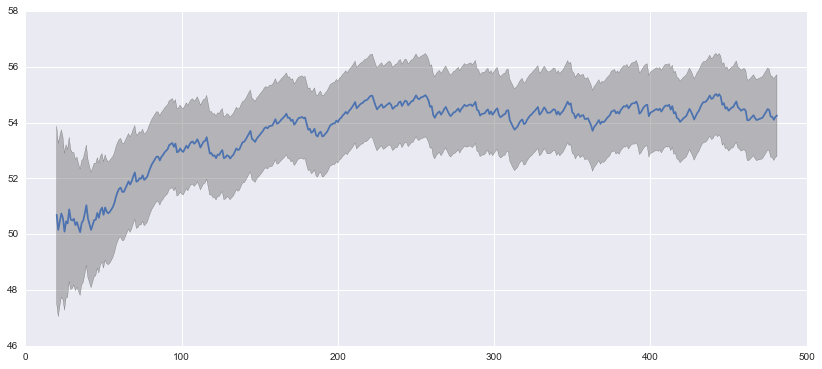

In [9]:
def plot_converge(player):
    player_mus = []
    player_sigmas = []
    player_dates = []
    for r_data in player.rating_data[20:]:
        player_mus.append(r_data.mu)
        player_sigmas.append(r_data.sigma)
        player_dates.append(datetime.datetime.strptime(r_data.timestamp,'%Y-%m-%d %H:%M:%S'))

    player_mus = np.array(player_mus)
    player_sigmas = np.array(player_sigmas)
    dates = matplotlib.dates.date2num(player_dates)

    sns.set_style("darkgrid")
    plt.rcParams["figure.figsize"] = [14.0, 6.0]
    plt.fill_between(range(20, len(player.rating_data)), player_mus+player_sigmas*2, player_mus-player_sigmas*2, facecolor='grey', alpha=0.5)
    plt.plot(range(20, len(player.rating_data)), player_mus)
    plt.show()
    
#     plt.fill_between(range(20, len(player.rating_data)), player_sigmas, facecolor='grey')
#     plt.ylim((0,1))
#     plt.show()
    
    
plot_converge(players["mzotkiew"])

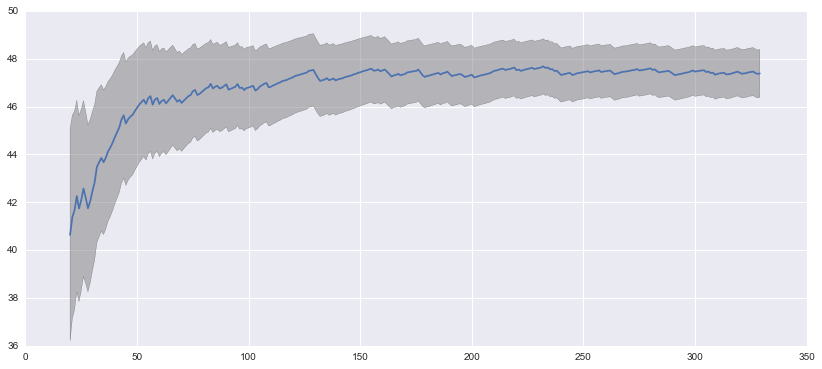

In [10]:
plot_converge(players_topbottom["mzotkiew"])

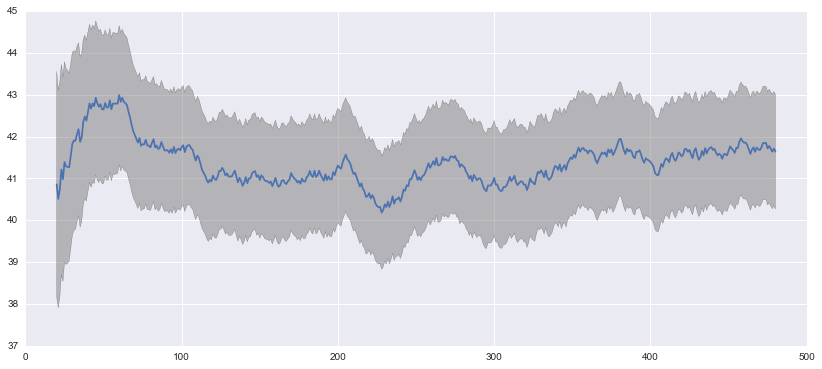

In [11]:
plot_converge(players["DanielVF"])

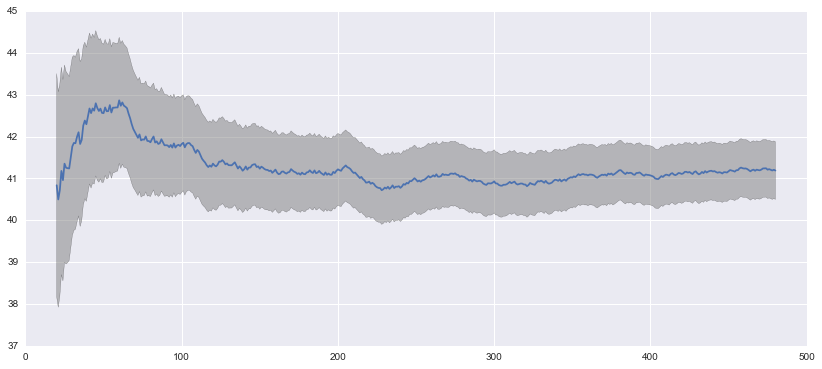

In [12]:
plot_converge(players_low_tau["DanielVF"])

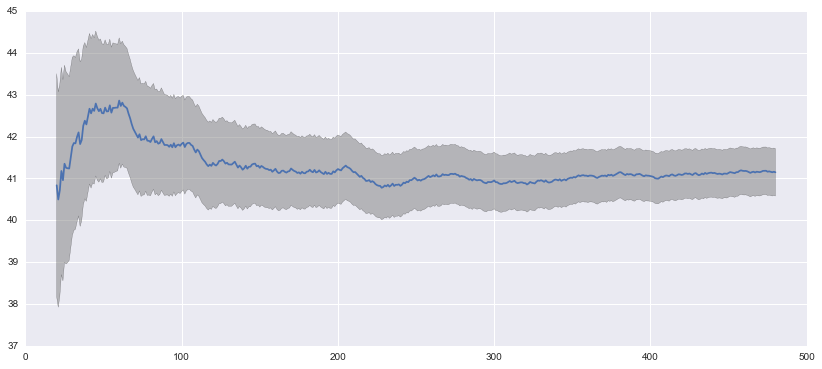

In [13]:
plot_converge(players_low_low_tau["DanielVF"])

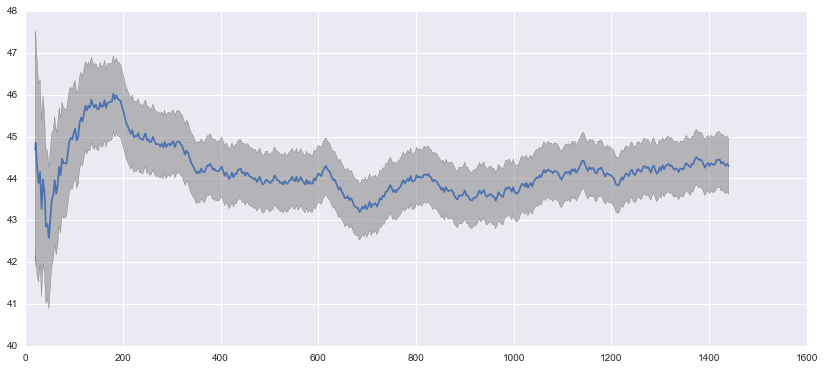

In [14]:
plot_converge(players_triple_games_low_tau["DanielVF"])

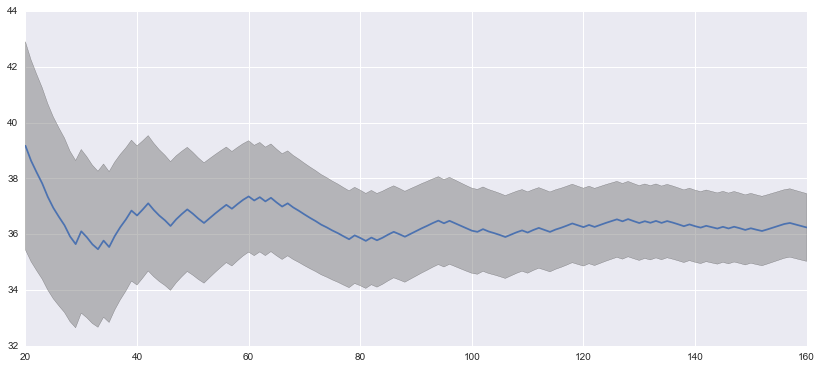

In [15]:
plot_converge(players_topbottom["DanielVF"])

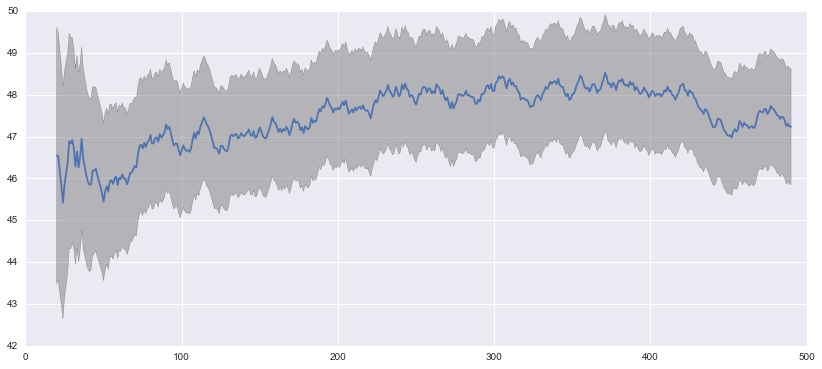

In [16]:
plot_converge(players["nmalaguti"])

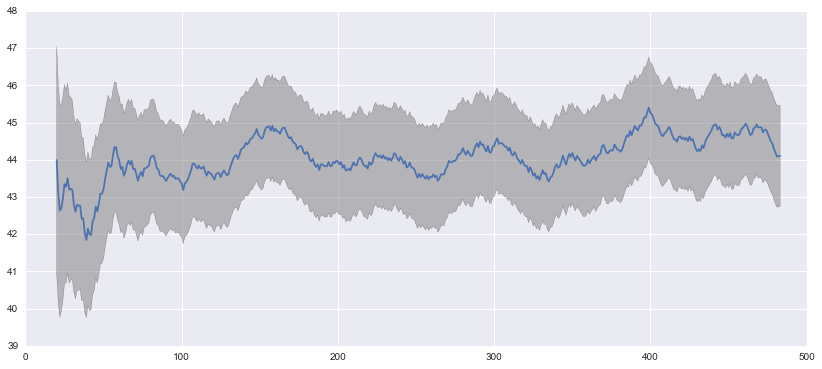

In [17]:
plot_converge(players["tmseiler"])

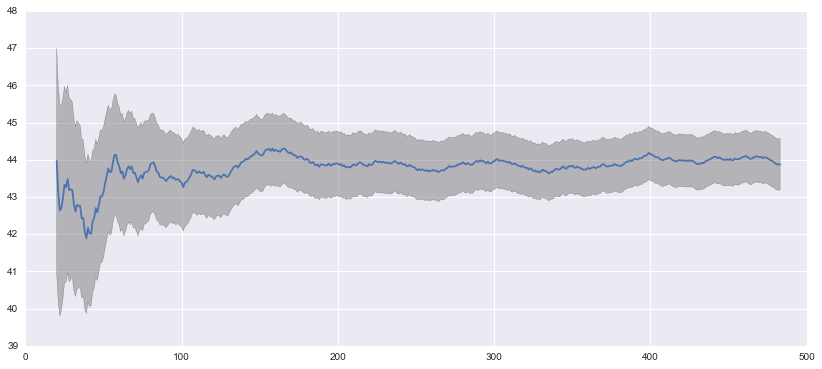

In [18]:
plot_converge(players_low_tau["tmseiler"])

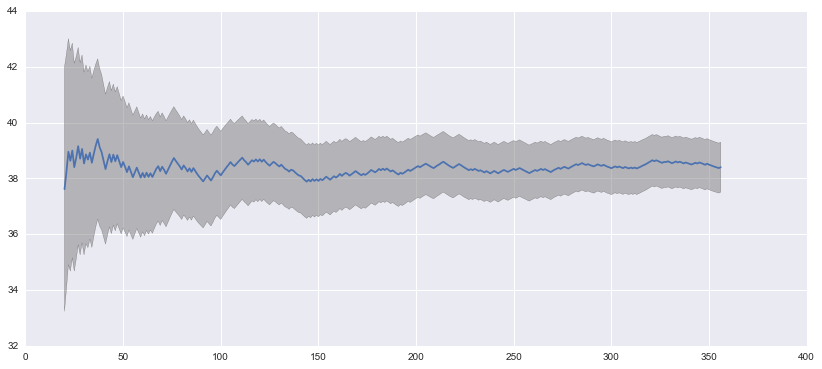

In [19]:
plot_converge(players_topbottom["tmseiler"])

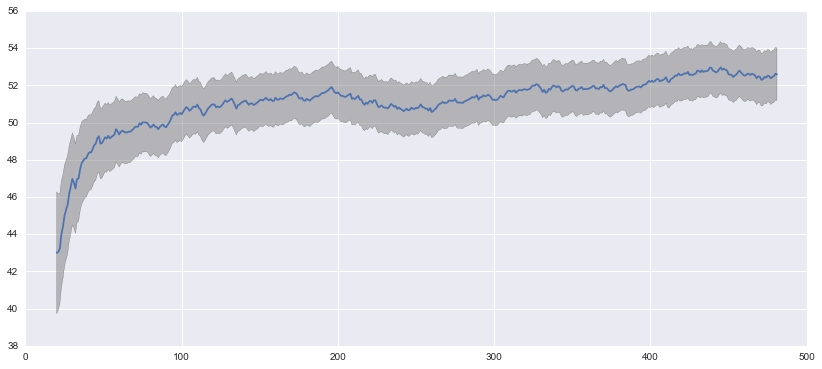

In [20]:
plot_converge(players["shummie"])

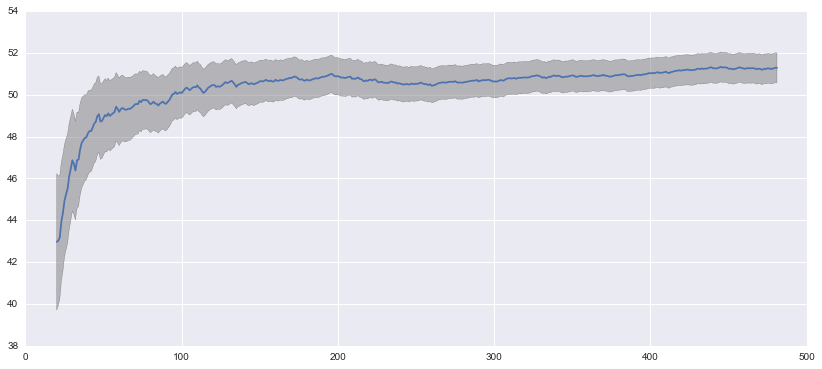

In [21]:
plot_converge(players_low_tau["shummie"])

In [22]:
def leaderboard(players, num_players=10):
    ranked_players = []
    
    for username, player in players.iteritems():
        ranked_players.append([username, player.rating_data[-1].mu, player.rating_data[-1].sigma])
       
    ranked_players.sort(key=lambda x: 0-x[1])
    
    return ranked_players[0: num_players]

leaderboard(players)

[[u'mzotkiew', 54.25164072008568, 0.729521403398841],
 [u'shummie', 52.5930726725719, 0.7044362086398058],
 [u'erdman', 51.92812586371204, 0.699159615752178],
 [u'timfoden', 50.57241439125316, 0.6978003597867559],
 [u'cdurbin', 50.12013227073953, 0.6960393386948747],
 [u'PeppiKokki', 47.69578086111901, 0.6842954273262551],
 [u'DexGroves', 47.51097481529998, 0.6899152218266105],
 [u'nmalaguti', 47.23585314650717, 0.6906798819527448],
 [u'moonbirth', 47.01611834162378, 0.6947208888829217],
 [u'ewirkerman', 46.47522279885338, 0.6958045819042794]]

In [23]:
leaderboard(players_low_tau)

[[u'mzotkiew', 53.55014975260704, 0.37543497168577117],
 [u'shummie', 51.28311214750074, 0.35462118629956657],
 [u'erdman', 50.811029447696974, 0.35489406618605013],
 [u'timfoden', 49.7039075277021, 0.3534267863292393],
 [u'cdurbin', 48.68470503283949, 0.35058043613893414],
 [u'nmalaguti', 47.00200337372747, 0.3502720109978896],
 [u'PeppiKokki', 46.77573029292162, 0.34949065510997834],
 [u'DexGroves', 46.46738122852398, 0.3542769157550556],
 [u'ewirkerman', 45.86783455642491, 0.3510440193399146],
 [u'moonbirth', 45.521611880737964, 0.3508430459650598]]

In [24]:
leaderboard(players_triple_games_low_tau)

[[u'mzotkiew', 57.423104016133664, 0.3578534190932145],
 [u'shummie', 55.628637514059285, 0.3442834313338807],
 [u'erdman', 54.92827093762868, 0.3423425270155714],
 [u'timfoden', 53.71036719678778, 0.3418059917862999],
 [u'cdurbin', 53.13257468109602, 0.3406398017026373],
 [u'PeppiKokki', 50.7248145903482, 0.33601034325558804],
 [u'nmalaguti', 50.522611891470746, 0.33856413080342035],
 [u'DexGroves', 50.4624542520151, 0.33951024143153746],
 [u'moonbirth', 49.847122132776185, 0.340175032326201],
 [u'ewirkerman', 49.576479423205384, 0.3408976666665876]]

In [25]:
leaderboard(players_topbottom)

[[u'mzotkiew', 47.3880492198353, 0.49981685294565825],
 [u'erdman', 46.67391376642505, 0.59881010092763],
 [u'shummie', 45.06879790003896, 0.5832561218538387],
 [u'timfoden', 43.2816375705302, 0.4283579740848109],
 [u'nmalaguti', 41.75209990640371, 0.5858413124632359],
 [u'cdurbin', 41.50644369066508, 0.5190760047547289],
 [u'acouette', 41.28395041688711, 0.5574924123341497],
 [u'KalraA v92', 40.7041667866606, 0.5654404201570962],
 [u'PeppiKokki', 40.56469138911979, 0.45903402798441406],
 [u'DexGroves', 40.2057553798052, 0.5712850809085122]]

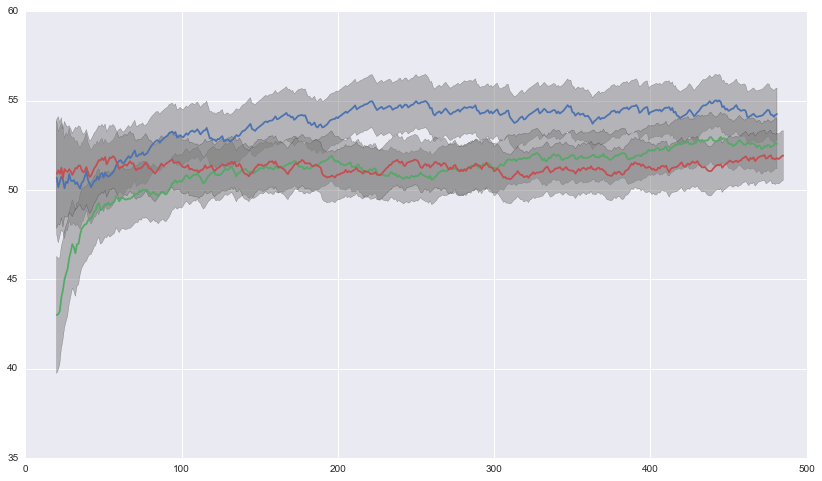

In [26]:
def plot_compare(players, player_names, ysize=8.0, starting_game=20, show_sigma=True):
    for name in player_names:
        player = players[name]
        player_mus = []
        player_sigmas = []
        player_dates = []
        for r_data in player.rating_data[starting_game:]:
            player_mus.append(r_data.mu)
            player_sigmas.append(r_data.sigma)
            player_dates.append(datetime.datetime.strptime(r_data.timestamp,'%Y-%m-%d %H:%M:%S'))

        player_mus = np.array(player_mus)
        player_sigmas = np.array(player_sigmas)
        dates = matplotlib.dates.date2num(player_dates)

        sns.set_style("darkgrid")
        plt.rcParams["figure.figsize"] = [14.0, ysize]
        if show_sigma:
            plt.fill_between(range(starting_game, len(player.rating_data)), player_mus+player_sigmas*2, player_mus-player_sigmas*2, facecolor='grey', alpha=0.5,)
        plt.plot(range(starting_game, len(player.rating_data)), player_mus)
    plt.show()
    
    
plot_compare(players,["mzotkiew","shummie","erdman"])

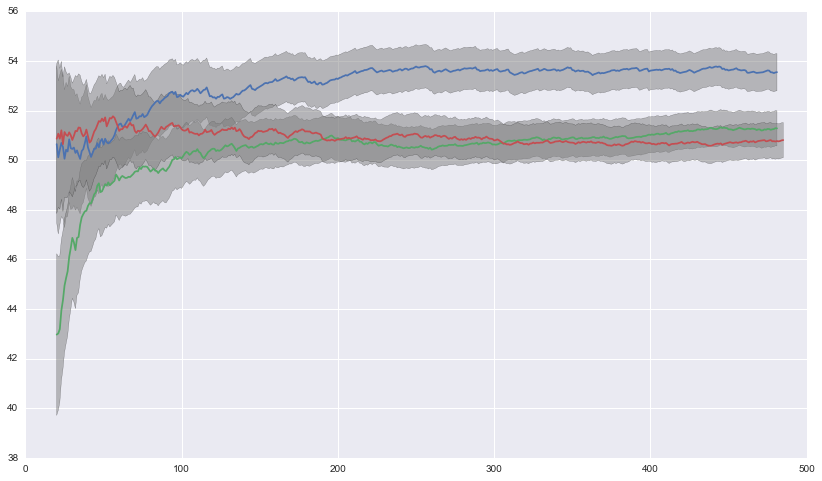

In [27]:
plot_compare(players_low_tau,["mzotkiew","shummie","erdman"])

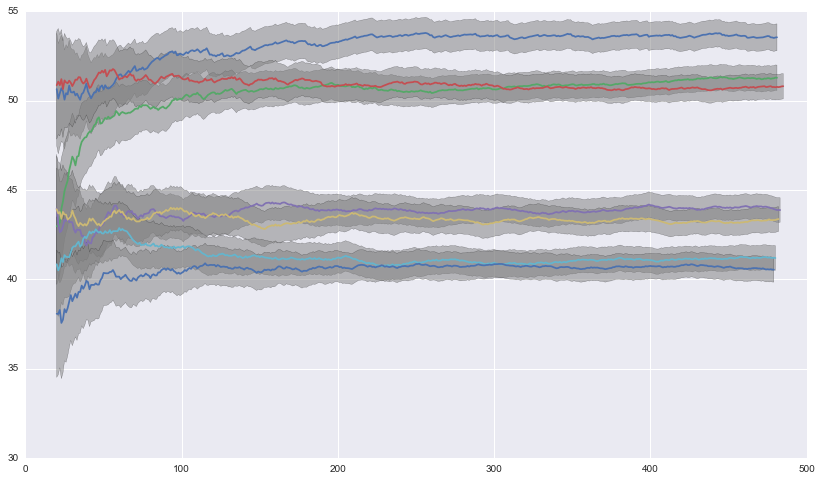

In [28]:
plot_compare(players_low_tau,["mzotkiew","shummie","erdman",  "tmseiler", "djma", "DanielVF", "Sydriax"])

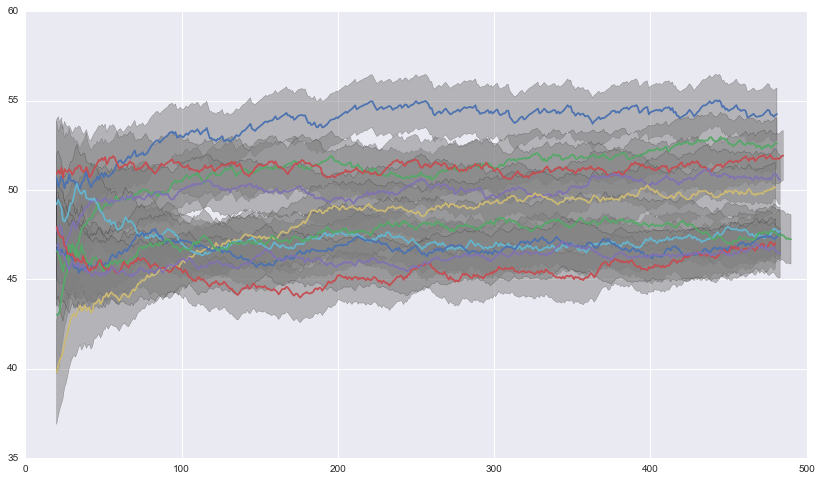

In [29]:
plot_compare(players, [x[0] for x in leaderboard(players)])

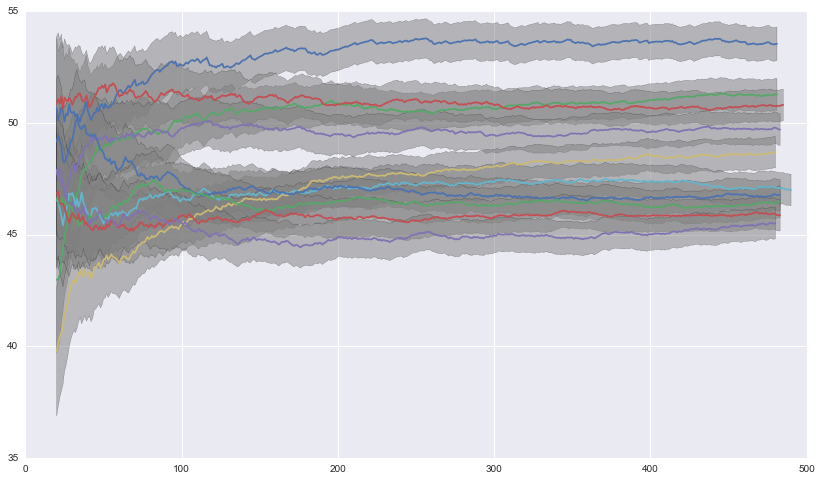

In [30]:
plot_compare(players_low_tau, [x[0] for x in leaderboard(players_low_tau, 10)])

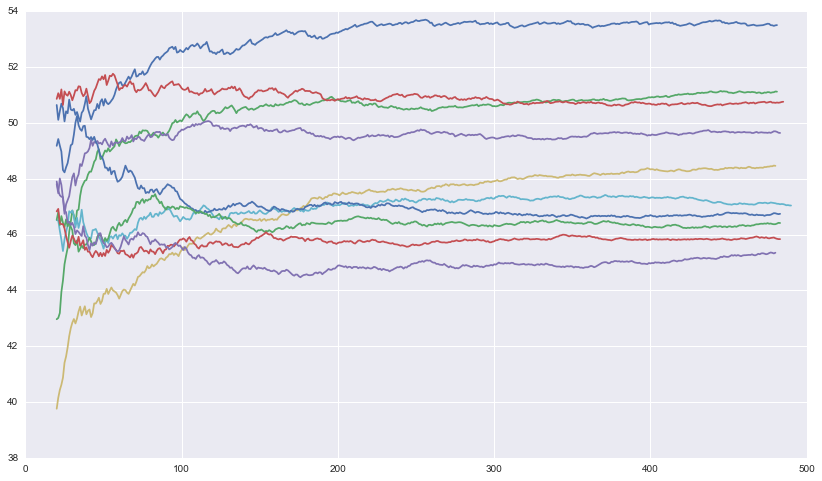

In [31]:
plot_compare(players_low_low_tau, [x[0] for x in leaderboard(players_low_tau, 10)], show_sigma=False)

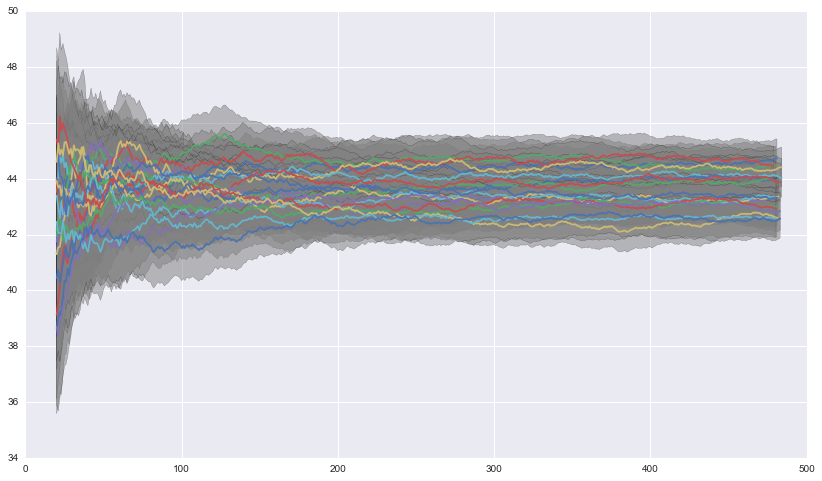

In [32]:
plot_compare(players_low_tau, [x[0] for x in leaderboard(players_low_tau, 30)][10:-1])

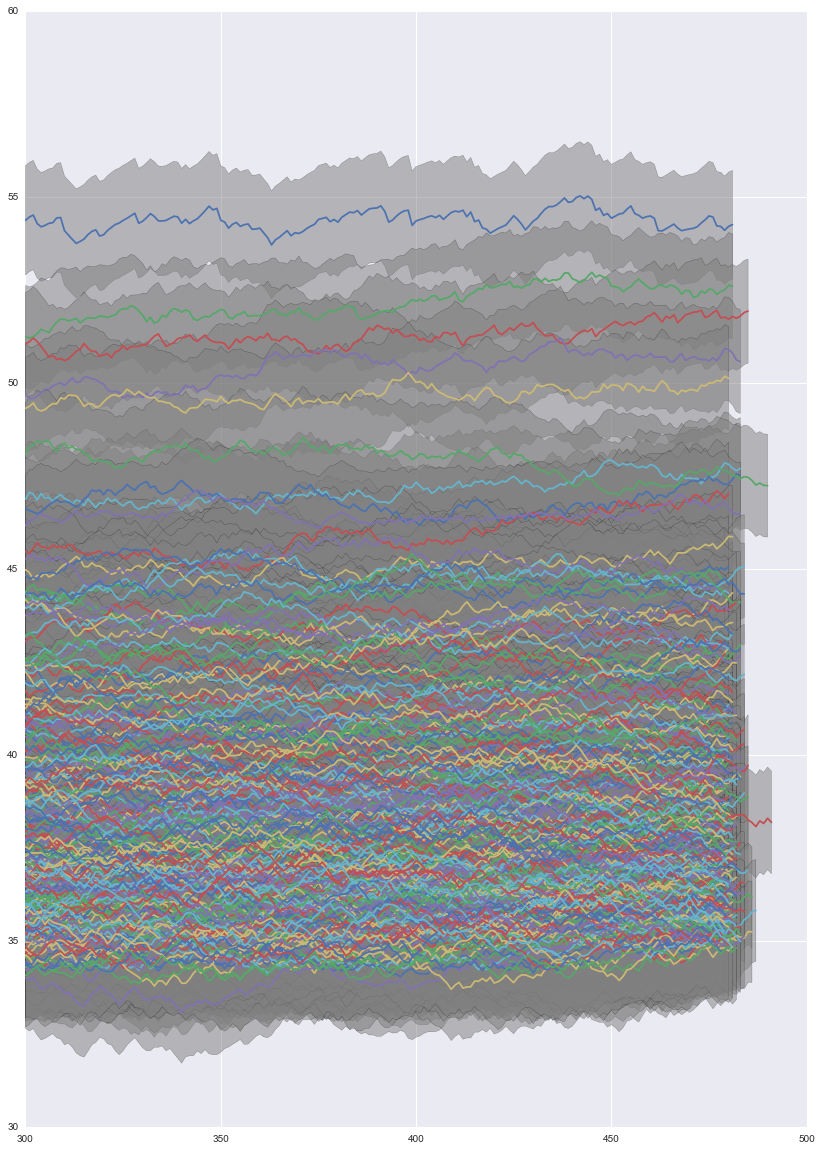

In [33]:
plot_compare(players, [x[0] for x in leaderboard(players, 200)], ysize=20, starting_game=300)

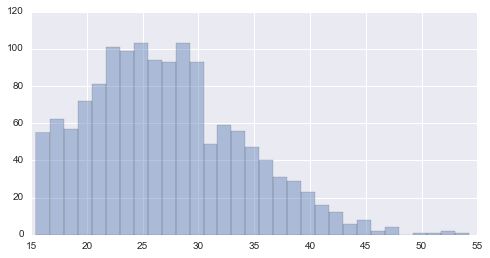

In [34]:
sns.set(rc={"figure.figsize": (8, 4)});
sns.distplot([x[1] for x in leaderboard(players, 1400)], bins=31, kde=False)

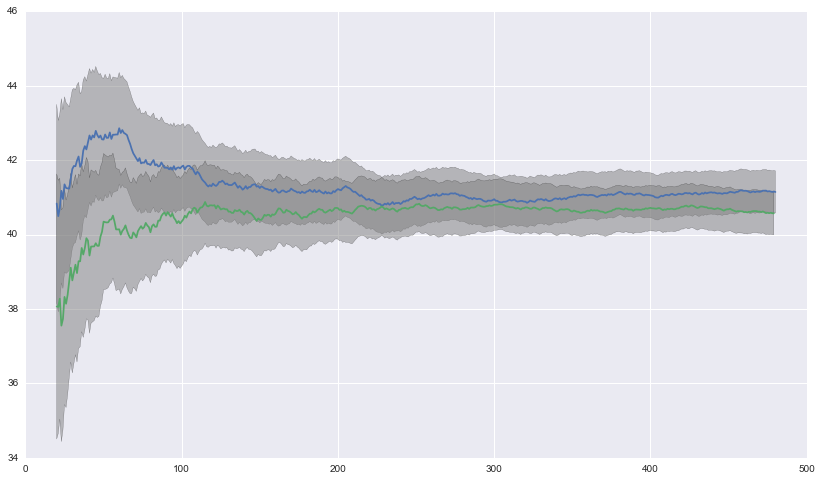

In [35]:
plot_compare(players_low_low_tau,["DanielVF", "Sydriax"])

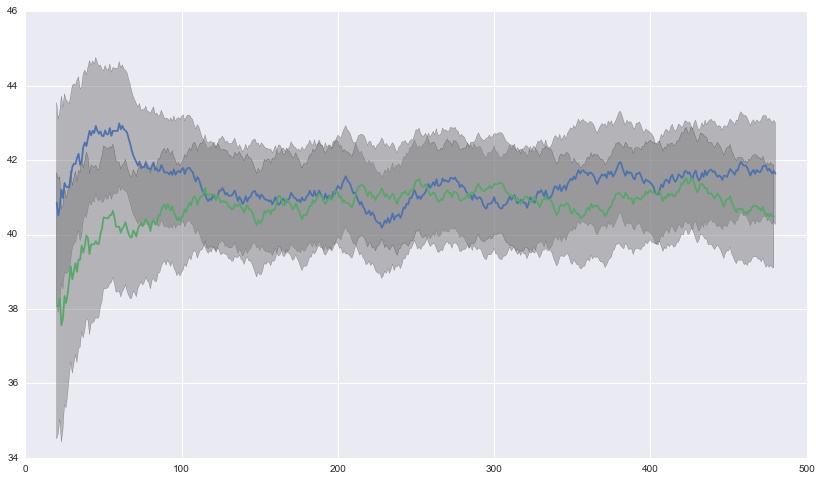

In [36]:
plot_compare(players,["DanielVF", "Sydriax"])

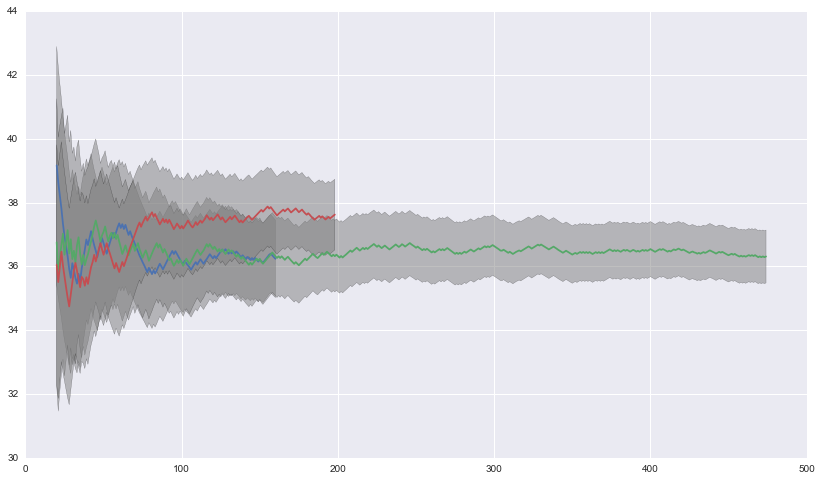

In [52]:
plot_compare(players_topbottom,["DanielVF", "Sydriax"])

### For arjunvis

Forum request for charts

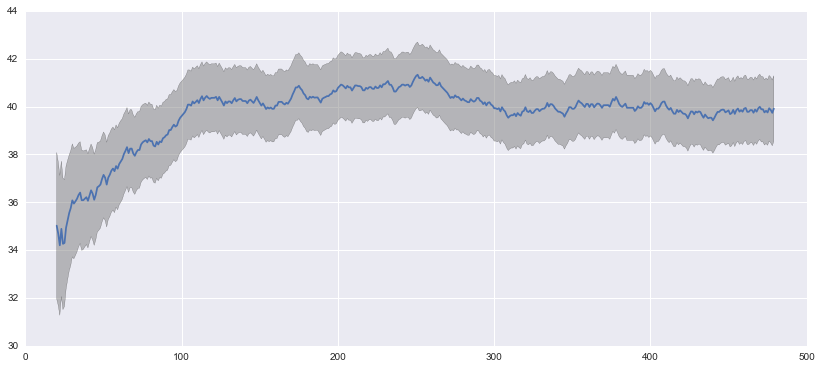

In [38]:
plot_converge(players["arjunvis"])

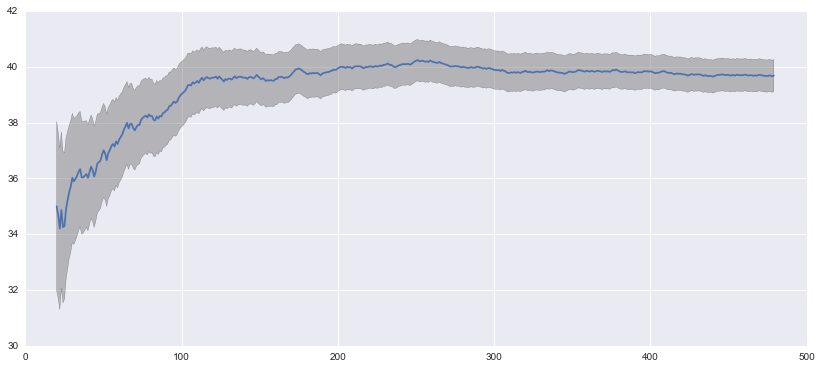

In [39]:
plot_converge(players_low_low_tau["arjunvis"])

### For Janzert

Comparing a player who as moved around more than any other

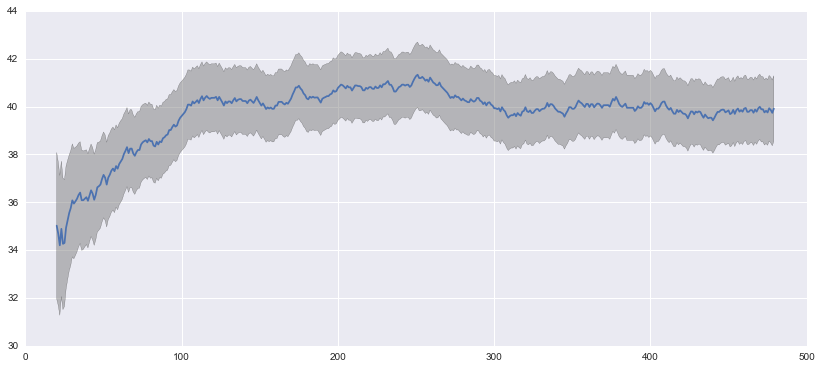

In [40]:
plot_converge(players["arjunvis"])

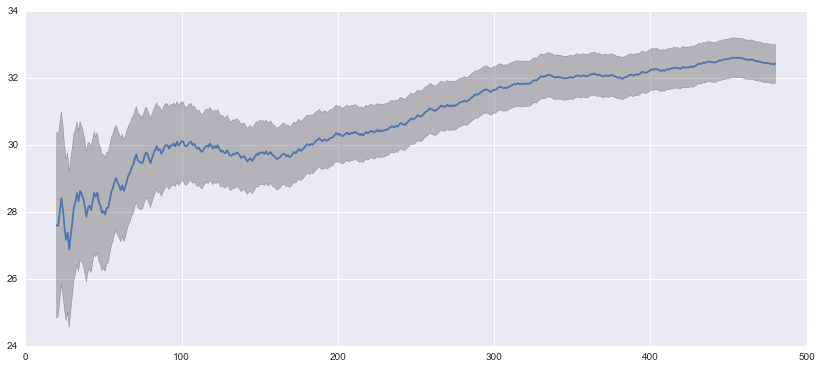

In [41]:
plot_converge(players_low_low_tau["dsgolding"])

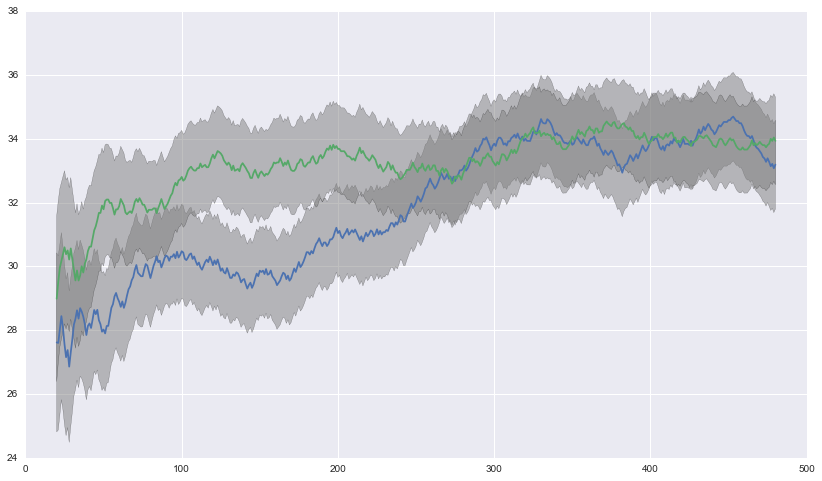

In [42]:
plot_compare(players,["dsgolding", "baxterj"])

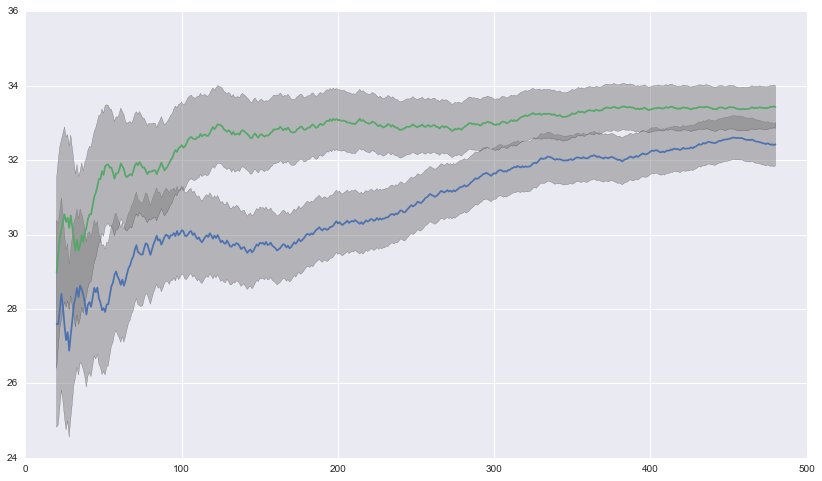

In [43]:
plot_compare(players_low_low_tau,["dsgolding", "baxterj"])

### The zone of awkward

At after turn 200, only players of rank 400 or more seed games. This creates a scoring area with lots of people with variable numbers of games.

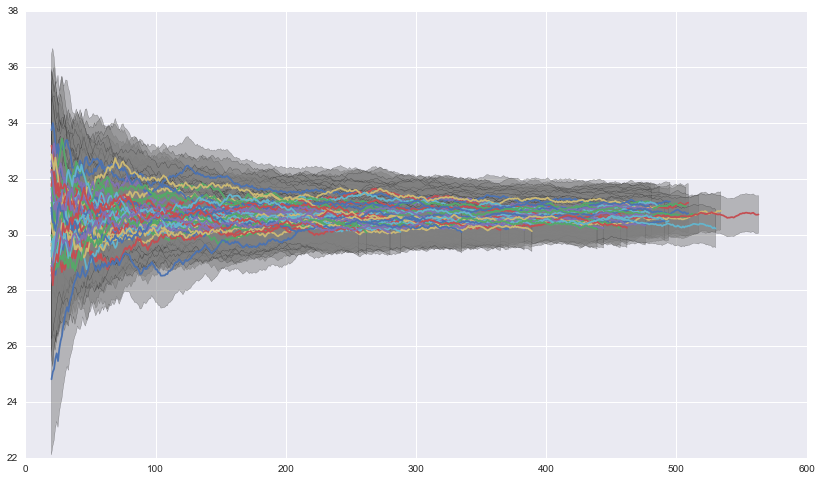

In [44]:
plot_compare(players_low_tau, [x[0] for x in leaderboard(players_low_tau, 420)][380:])

In [45]:
### Plot top 15

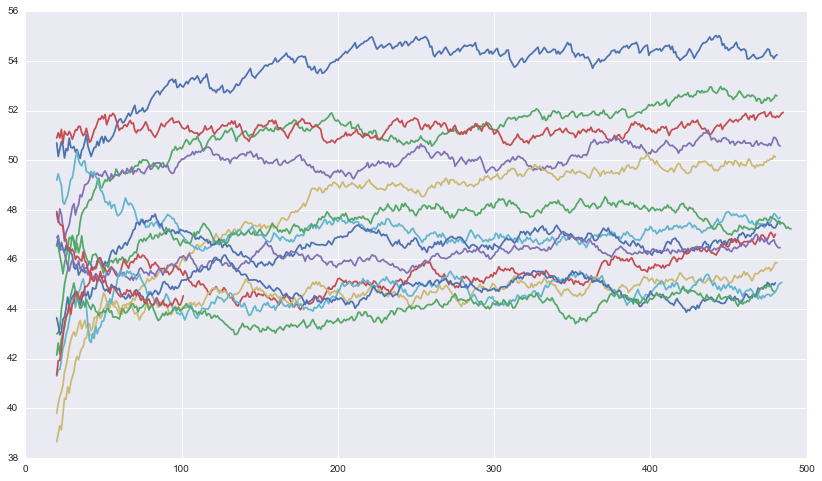

In [46]:
plot_compare(players, [x[0] for x in leaderboard(players, 15)], show_sigma=False)

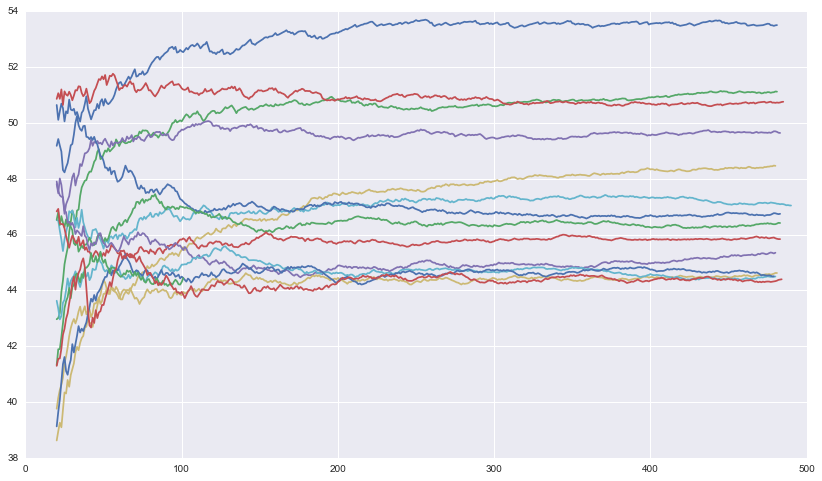

In [47]:
plot_compare(players_low_low_tau, [x[0] for x in leaderboard(players_low_tau, 15)], show_sigma=False)

In [48]:
leaderboard(players_low_low_tau, 15)

[[u'mzotkiew', 53.508723319164496, 0.31634008515197787],
 [u'shummie', 51.123364960635804, 0.2935475465103714],
 [u'erdman', 50.761433878690816, 0.2948410139051613],
 [u'timfoden', 49.64360042487932, 0.29222444911716466],
 [u'cdurbin', 48.46452626904496, 0.28931490943343713],
 [u'nmalaguti', 47.04215552364073, 0.2892466165009872],
 [u'PeppiKokki', 46.74445784860804, 0.28924035579083823],
 [u'DexGroves', 46.415632755074064, 0.29337410191112623],
 [u'ewirkerman', 45.838188828044935, 0.28954415045069026],
 [u'moonbirth', 45.34986062033871, 0.2896648316304827],
 [u'veden', 44.6236927877676, 0.287961563583928],
 [u'acouette', 44.50663151426714, 0.292645752462866],
 [u'MoreGames', 44.497734200336254, 0.28547069805497094],
 [u'KalraA v91', 44.44196866885488, 0.597330333997882],
 [u'KalraA v92', 44.3983021979724, 0.29257634055078735]]

### Will Tim Foden take third?

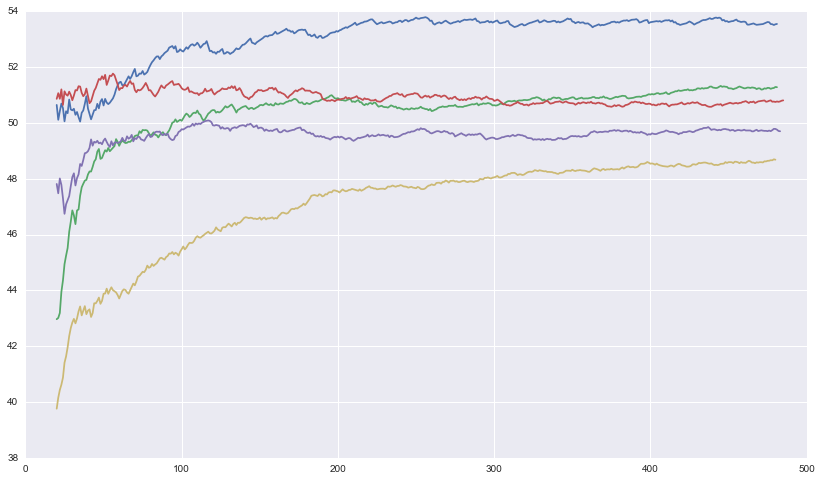

In [49]:
plot_compare(players_low_tau, [x[0] for x in leaderboard(players_low_tau, 5)], show_sigma=False)

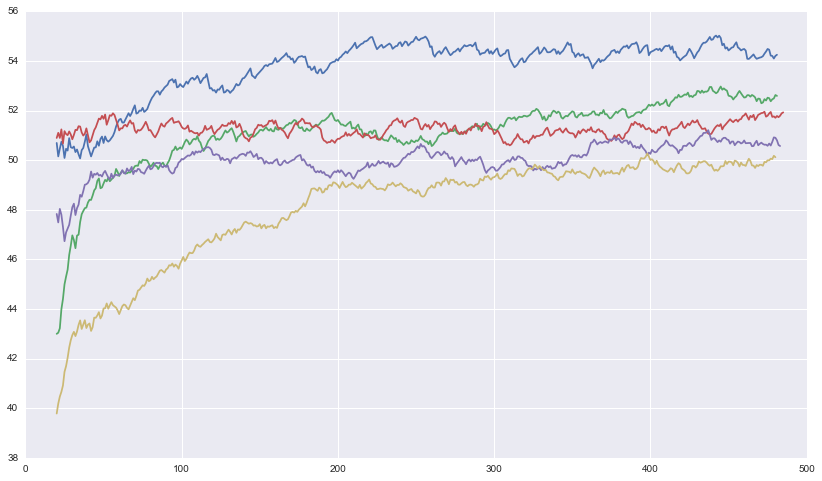

In [50]:
plot_compare(players, [x[0] for x in leaderboard(players, 5)], show_sigma=False)

In [51]:
leaderboard(players_low_tau, 110)

[[u'mzotkiew', 53.55014975260704, 0.37543497168577117],
 [u'shummie', 51.28311214750074, 0.35462118629956657],
 [u'erdman', 50.811029447696974, 0.35489406618605013],
 [u'timfoden', 49.7039075277021, 0.3534267863292393],
 [u'cdurbin', 48.68470503283949, 0.35058043613893414],
 [u'nmalaguti', 47.00200337372747, 0.3502720109978896],
 [u'PeppiKokki', 46.77573029292162, 0.34949065510997834],
 [u'DexGroves', 46.46738122852398, 0.3542769157550556],
 [u'ewirkerman', 45.86783455642491, 0.3510440193399146],
 [u'moonbirth', 45.521611880737964, 0.3508430459650598],
 [u'veden', 44.72869755437701, 0.34788807808056094],
 [u'MoreGames', 44.47198089028192, 0.3470197938722644],
 [u'acouette', 44.45710293395727, 0.35221983212349633],
 [u'KalraA v91', 44.445487769985185, 0.6052760989376297],
 [u'KalraA v92', 44.42539151925648, 0.35156905796081006],
 [u'tondonia', 44.035016160011565, 0.34762712105875176],
 [u'fohristiwhirl', 43.94908512734563, 0.34476770478342816],
 [u'jstaker7', 43.939361538063224, 0.34776